### PCA
**On Iris Flowers Dataset**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
y[:5]

array([0, 0, 0, 0, 0])

In [4]:
classes = np.unique(y)
classes

array([0, 1, 2])

In [6]:
n_features = X.shape[1]
n_features

4

In [8]:
overall_mean = np.mean(X, axis=0)
overall_mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [10]:
# x-axis = 0, y-axis = 1, z-axis = 3
S_W = np.zeros((n_features, n_features))
type(S_W)
S_W

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [11]:
S_B = np.zeros((n_features, n_features))

In [12]:
for c in classes:
    X_c = X[y==c]
    mean_c = np.mean(X_c, axis=0)
    S_W += (X_c - mean_c).T @ (X_c - mean_c)
    
    n_c = X_c.shape[0]
    mean_diff = (mean_c - overall_mean).reshape(-1, 1)
    S_B += n_c * (mean_diff @ mean_diff.T)
    

In [15]:
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W) @ S_B)
eigvals, eigvecs

(array([ 3.21919292e+01,  2.85391043e-01, -1.60678244e-15, -9.19583748e-15]),
 array([[-0.20874182, -0.00653196,  0.87924206,  0.15169622],
        [-0.38620369, -0.58661055, -0.32816889,  0.28172319],
        [ 0.55401172,  0.25256154, -0.31374947,  0.35490222],
        [ 0.7073504 , -0.76945309, -0.1442215 , -0.87844448]]))

In [17]:
sorted_indices = np.argsort(-eigvals.real)
eigvecs = eigvecs[:, sorted_indices]
eigvals = eigvals[sorted_indices]
sorted_indices

array([0, 1, 2, 3], dtype=int64)

In [18]:
W = eigvecs[:, :2].real
W

array([[-0.20874182, -0.00653196],
       [-0.38620369, -0.58661055],
       [ 0.55401172,  0.25256154],
       [ 0.7073504 , -0.76945309]])

In [19]:
X_lda_scratch = X@W
X_lda_scratch

array([[-1.49920971, -1.88675441],
       [-1.2643595 , -1.59214275],
       [-1.35525305, -1.73341462],
       [-1.18495616, -1.62358806],
       [-1.5169559 , -1.94476227],
       [-1.40864014, -2.20148038],
       [-1.28548339, -1.90177269],
       [-1.38431399, -1.80218401],
       [-1.12136823, -1.53021571],
       [-1.31831374, -1.54860234],
       [-1.58367182, -1.98077996],
       [-1.28716445, -1.77562146],
       [-1.31422036, -1.51454424],
       [-1.37605297, -1.58704672],
       [-1.94923317, -2.23514437],
       [-1.77516687, -2.54725756],
       [-1.63024483, -2.302505  ],
       [-1.42847467, -1.96369972],
       [-1.50337736, -2.06783361],
       [-1.48893461, -2.11442674],
       [-1.35700838, -1.75428449],
       [-1.3795792 , -2.13271099],
       [-1.65506386, -2.0431741 ],
       [-1.04356034, -1.92449977],
       [-1.12096094, -1.699853  ],
       [-1.17443134, -1.54228363],
       [-1.18744274, -1.93081847],
       [-1.46468272, -1.86215146],
       [-1.48146353,

In [20]:
# Plotting
plt.figure(figsize=(8,6))
markers = ['o', 's', '^']
colors = ['red', 'green', 'blue']

<Figure size 800x600 with 0 Axes>

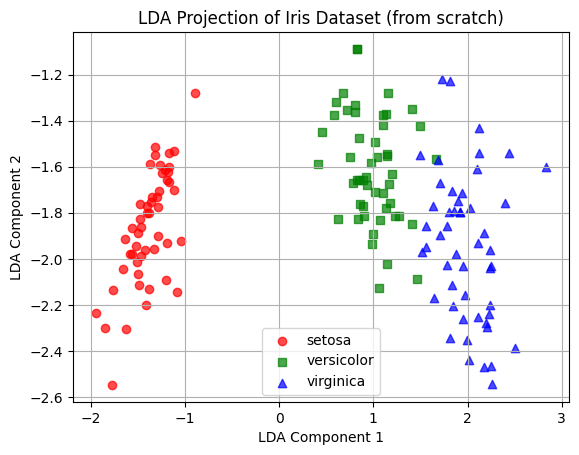

In [23]:
for label, marker, color in zip(classes, markers, colors):
    plt.scatter(X_lda_scratch[y==label, 0], 
                X_lda_scratch[y==label, 1],
                marker=marker,
                color=color,
                alpha=0.7,
                label = iris.target_names[label]
                )
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Iris Dataset (from scratch)")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Checking the accuracy
from sklearn.metrics import accuracy_score

# Step 1: Compute class means in LDA space
class_means_lda = {}
for c in classes:
    class_means_lda[c] = np.mean(X_lda_scratch[y == c], axis=0)

# Step 2: Classify each sample by nearest mean in LDA space
y_pred = []
for x in X_lda_scratch:
    distances = [np.linalg.norm(x - class_means_lda[c]) for c in classes]
    y_pred.append(np.argmin(distances))

# Step 3: Accuracy
accuracy = accuracy_score(y, y_pred)
accuracy

0.98